# . 가장 닮은꼴 연예인 찾기


## library import

In [114]:
import face_recognition
import os

#인식한 부분 크롭
import matplotlib.pyplot as plt

%matplotlib inline


## img file 

In [ ]:
dir_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E12-face_embed/imgs/p2'
file_list = os.listdir(dir_path)


print ("file_list: {}".format(file_list))

In [116]:
file_extension_dict ={}
for file in file_list:
    name, extension = file.split(".")
    #print(name, extension)
    file_extension_dict[name] = extension

## face recogination & crop

In [ ]:

cropped_dict = {}
for file in file_list:
    #print(dir_path+file)
    image = face_recognition.load_image_file(dir_path+"/"+file) # img load
    face_locations = face_recognition.face_locations(image) # 얼굴 인식 검출
    
    #print(face_locations)
    # 얼굴이 검출 안됬을대 스킵 
    if len(face_locations) == 0 : continue
    
    # 2개 나올땐 우짜노.
    
    a, b, c, d = face_locations[0] # 좌표 색출
    cropped_face = image[a:c,d:b,:] # 얼굴
    
    cropped_dict[file.split(".")[0]] = cropped_face #

cropped_dict

## 임베딩

In [118]:
embedding_dict ={}

for name, face in cropped_dict.items():
    # face data vector 임베딩
    embeding_face = face_recognition.face_encodings(face)
    
    #print(embeding_face)
    
    # embeding_face 잘 안됬을시?
    if len(embeding_face) == 0 : continue
    
    embeding_dict[name] = embeding_face[0]

embedding_dict

{}

In [119]:
# 두개 간 간격 비교.

def get_distance(name1, name2):
    return np.linalg.norm(embeding_dict[name1]-embeding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.8885117374787042

## 거리 계산 및 정렬 / to5 출력

In [120]:
#두 이미지칸 백터 거리 계산후 오름차순 정렬
target ="손흥민"
sorted_dict = sorted(embeding_dict.items(), \
                     key=lambda x: np.linalg.norm(embeding_dict[target]-embeding_dict[x[0]], ord=2))


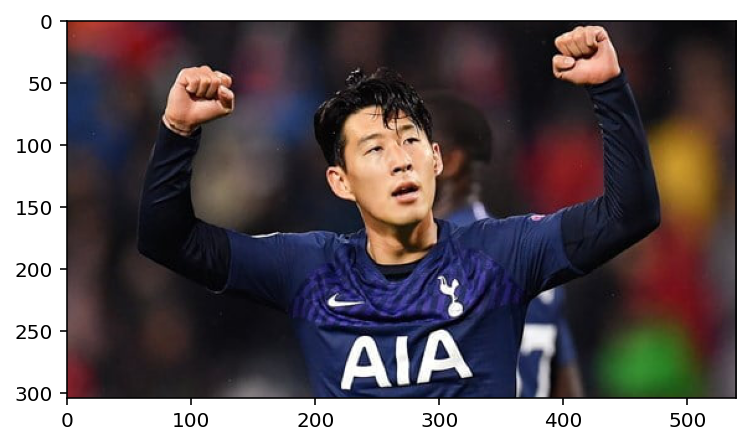

In [121]:
image = face_recognition.load_image_file(dir_path+"/"+target+"."+file_extension_dict[target])
plt.imshow(image)

손흥민 닮은 사람
순위 1 / : 이름: 박건우 / 거리: 0.37492589034740503
순위 2 / : 이름: 안재홍 / 거리: 0.3814667058222003
순위 3 / : 이름: 정수빈 / 거리: 0.41754458308086995
순위 4 / : 이름: 차명석 / 거리: 0.4276523667229284
순위 5 / : 이름: 유해진 / 거리: 0.4286177097607808


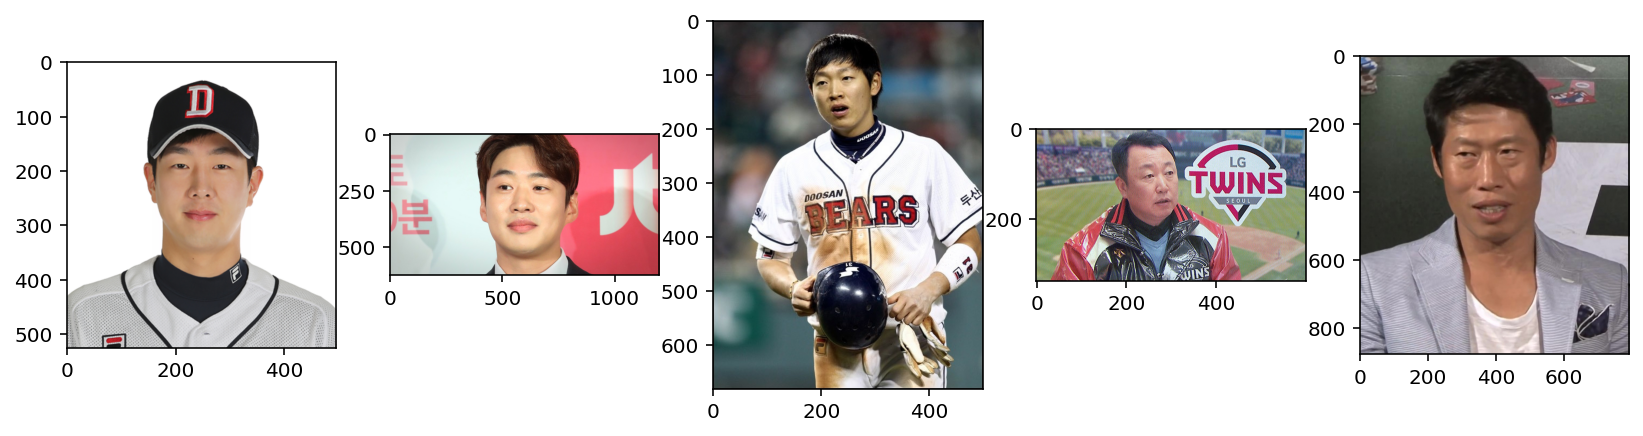

In [133]:
# top 5 출력

print(target,"닮은 사람")
fig = plt.figure()
for idx in range(1,6):
    print("순위 {} / : 이름: {} / 거리: {}".format(idx, sorted_dict[idx][0], get_distance(target ,sorted_dict[idx][0])))
    imgName = sorted_dict[idx][0]
    image = face_recognition.load_image_file(dir_path+"/"+imgName+"."+file_extension_dict[imgName])
    sub = fig.add_subplot(1,5,idx)
    sub.imshow(image)


### 함수로 만들기



In [134]:
def get_nearest_faces(target):
    
    print("대상 이미지")
    image = face_recognition.load_image_file(dir_path+"/"+target+"."+file_extension_dict[target])
    plt.imshow(image)
    
    #정렬
    sorted_dict = sorted(embeding_dict.items(), \
                     key=lambda x: np.linalg.norm(embeding_dict[target]-embeding_dict[x[0]], ord=2))
    
    fig = plt.figure()
    for idx in range(1,8):
        print("순위 {} / : 이름: {} / 거리: {}".format(idx, sorted_dict[idx][0], get_distance(target ,sorted_dict[idx][0])))
        imgName = sorted_dict[idx][0]
        image = face_recognition.load_image_file(dir_path+"/"+imgName+"."+file_extension_dict[imgName])
        sub = fig.add_subplot(1,7,idx)
        #sub.title.set_text(imgName)
        sub.imshow(image)       

        
        

대상 이미지
순위 1 / : 이름: lsg-02 / 거리: 0.43400747376530135
순위 2 / : 이름: lsg-03 / 거리: 0.43442971469871444
순위 3 / : 이름: 이진호 / 거리: 0.4370453556360859
순위 4 / : 이름: 디오 / 거리: 0.4495210055536969
순위 5 / : 이름: 박명수 / 거리: 0.4657583576642204
순위 6 / : 이름: 박보영 / 거리: 0.46663822346881284
순위 7 / : 이름: 윤도현 / 거리: 0.47041063150669604


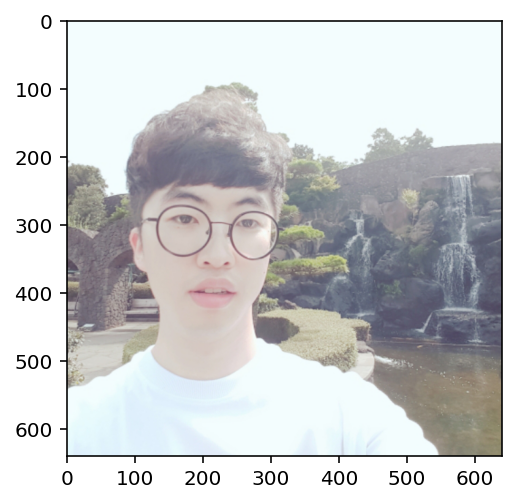

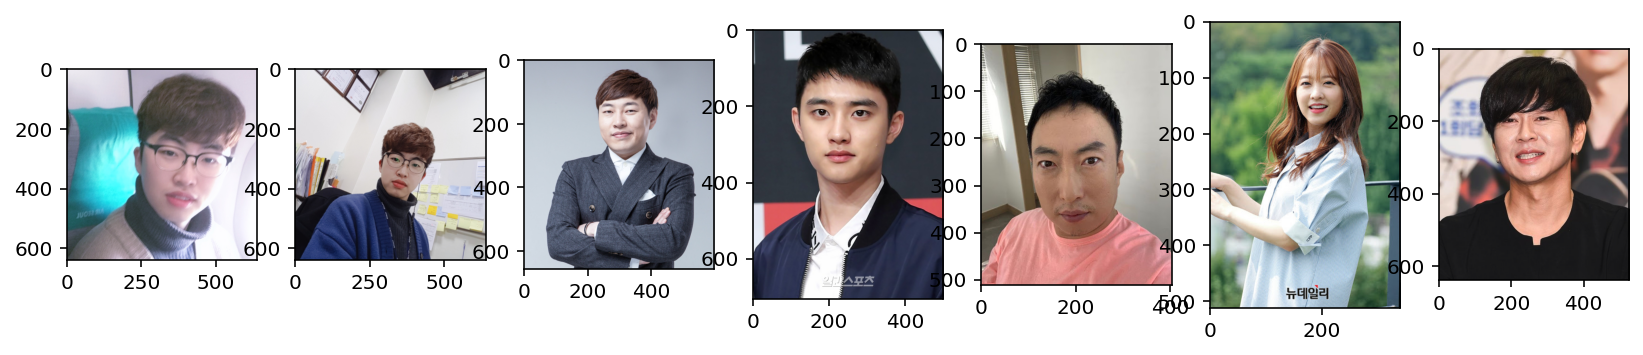

In [135]:
# 내 이미지
get_nearest_faces("lsg-01")

대상 이미지
순위 1 / : 이름: 류진 / 거리: 0.35818621172330356
순위 2 / : 이름: 아이즈원민주 / 거리: 0.3635245736951169
순위 3 / : 이름: 레드벨벳웬디 / 거리: 0.37756629194596986
순위 4 / : 이름: 사쿠라 / 거리: 0.37930930020356446
순위 5 / : 이름: 트와이스사나 / 거리: 0.3795161576331756
순위 6 / : 이름: 유리 / 거리: 0.37979451768124206
순위 7 / : 이름: 서현진 / 거리: 0.38795313155164923


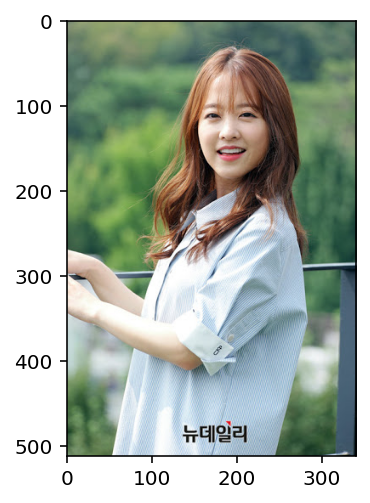

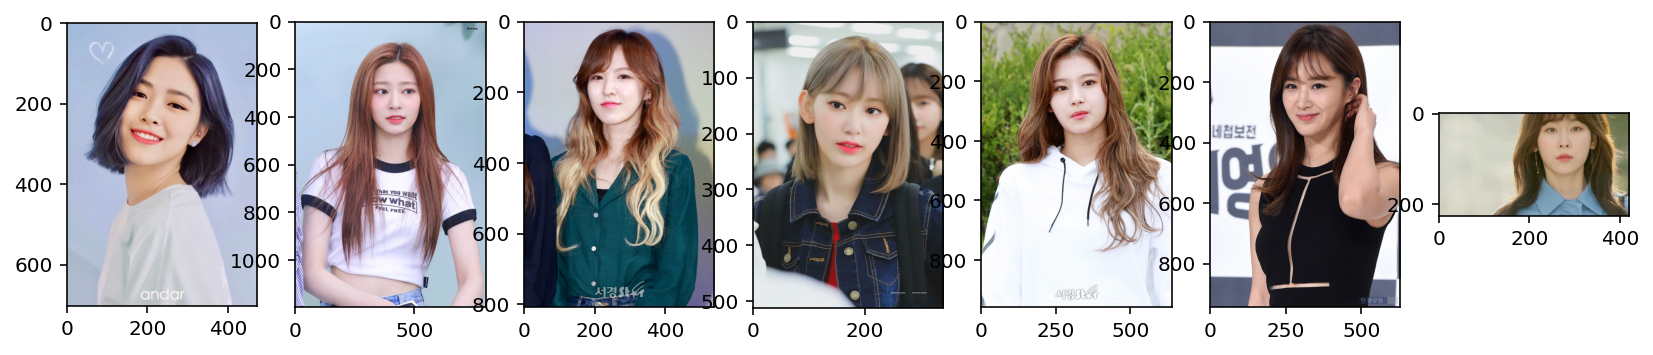

In [136]:
# 박보영
get_nearest_faces("박보영")